Sruvived 0=죽음, 1=생존

pclass 1=1st, 2=2nd, 3=3rd

sibsp 형제,남매,배우자

parch 부모님

ticket=ticket number

cabin = cabin number

embark = 어느곳에서 승선햇는가

In [72]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
train.shape

(891, 12)

In [75]:
test.shape #survived 를 예측해야 하기 때문에 11개

(418, 11)

In [76]:
train.info() #null값-> Age, Cabin, Embark

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

아 이부분을 많이 고민했다 

1. 그냥 나이의 중앙값을 넣는다

2. 현재 고객은 타이타닉호를 타고 여행중이다 어린아이가 혼자서 여행하기에는 무리가 있다 따라서 부모님이 있는경우 주로 어린이층,,,부모님이 없는 경우 노년층 위주로 결측값을 채운다

In [79]:
for i in range(891):
  if train['Parch'][i]>2:
    train['Age']=train['Age'].fillna(10)
  elif train['Parch'][i]>1:
    train['Age']=train['Age'].fillna(22)
  else:
    train['Age']=train['Age'].fillna(48)

for i in range(418):
  if test['Parch'][i]>2:
    test['Age']=test['Age'].fillna(10)
  elif test['Parch'][i]>1:
    test['Age']=test['Age'].fillna(22)
  else:
    test['Age']=test['Age'].fillna(48)

In [80]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [81]:
train['Embarked'] = train['Embarked'].fillna('S')#어차피 결측값이 2개 밖에 안되니깐

In [82]:
train.info()#cabin은 그냥 버릴 생각 ㅎ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [83]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,33.334646,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.914041,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,48.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


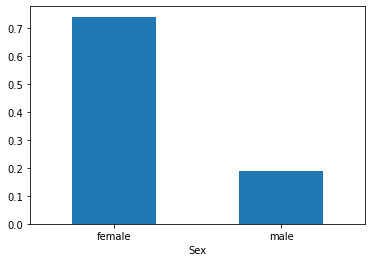

In [84]:
train.groupby('Sex').mean()['Survived'].plot(kind='bar',rot=0) #여성이 많이 살았다

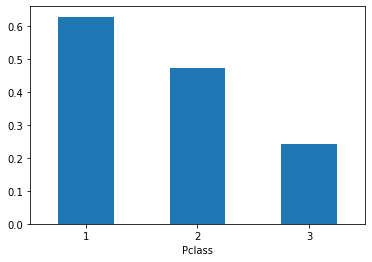

In [85]:
train.groupby('Pclass').mean()['Survived'].plot(kind='bar',rot=0) #1등급자리 생존확률 up

In [86]:
train['Sex'] = train['Sex'].map({'male':0,'female':1})#딕셔너리로 하기
train.head()

test['Sex'] = test['Sex'].map({'male':0,'female':1})

In [87]:
train['Embarked'] = train['Embarked'].map({"S": 0, "C": 1, "Q": 2})#딕셔너리로 하기
train.head()
test['Embarked'] = test['Embarked'].map({"S": 0, "C": 1, "Q": 2})

In [88]:
train["FamilySize"] = train["SibSp"] + train["Parch"]
train.head()

test["FamilySize"] = test["SibSp"] + test["Parch"]

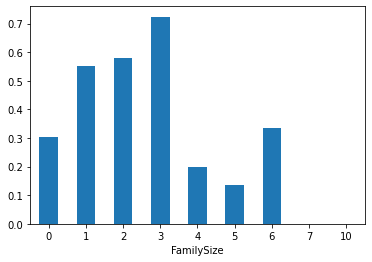

In [89]:
train.groupby('FamilySize').mean()['Survived'].plot(kind='bar',rot=0)#지킬사람이 있다면 생존확률이 더 높을지도..

In [90]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0


In [91]:
for age in [train]:
    age.loc[(age['Age'] <= 16), 'Age'] = 0
    age.loc[(age['Age'] > 16) & (age['Age'] <= 26), 'Age'] = 1
    age.loc[(age['Age'] > 26) & (age['Age'] <= 36), 'Age'] = 2
    age.loc[(age['Age'] > 36) & (age['Age'] <= 62), 'Age'] = 3
    age.loc[(age['Age'] > 62), 'Age'] = 4

for age in [test]:
    age.loc[(age['Age'] <= 16), 'Age'] = 0
    age.loc[(age['Age'] > 16) & (age['Age'] <= 26), 'Age'] = 1
    age.loc[(age['Age'] > 26) & (age['Age'] <= 36), 'Age'] = 2
    age.loc[(age['Age'] > 36) & (age['Age'] <= 62), 'Age'] = 3
    age.loc[(age['Age'] > 62), 'Age'] = 4

In [92]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0


In [93]:
train_input = train[['Pclass','Sex','Age','Embarked','FamilySize']]
train_target = train[['Survived']]

In [94]:
test_input = test[['Pclass','Sex','Age','Embarked','FamilySize']]

In [95]:
test_input.head(10)

,Pclass,Sex,Age,Embarked,FamilySize
0,3,0,2.0,2,0
1,3,1,3.0,0,1
2,2,0,3.0,2,0
3,3,0,2.0,0,0
4,3,1,1.0,0,2
5,3,0,0.0,0,0
6,3,1,2.0,2,0
7,2,0,1.0,0,2
8,3,1,1.0,1,0
9,3,0,1.0,0,2


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [97]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
kc = KNeighborsClassifier(n_neighbors = 13)
rc = RandomForestClassifier(n_estimators=70)
g = GaussianNB()
sc = SVC()

In [98]:
lr.fit(train_input,train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
lr.score(train_input,train_target)

0.8092031425364759

In [100]:
dt.fit(train_input,train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
dt.score(train_input,train_target)

0.8619528619528619

In [102]:
kc.fit(train_input,train_target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [103]:
kc.score(train_input,train_target)

0.8249158249158249

In [104]:
rc.fit(train_input,train_target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
rc.score(train_input,train_target)

0.8619528619528619

In [106]:
g.fit(train_input,train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [107]:
g.score(train_input,train_target)

0.8047138047138047

In [108]:
sc.fit(train_input,train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [109]:
sc.score(train_input,train_target)

0.8226711560044894

In [110]:
lr.predict_proba(test_input)#사망 생존 순서

array([[0.82355009, 0.17644991],
       [0.57000685, 0.42999315],
       [0.70839922, 0.29160078],
       [0.90821261, 0.09178739],
       [0.40551274, 0.59448726],
       [0.80890223, 0.19109777],
       [0.25373751, 0.74626249],
       [0.76120494, 0.23879506],
       [0.24459978, 0.75540022],
       [0.90350736, 0.09649264],
       [0.93799671, 0.06200329],
       [0.63680365, 0.36319635],
       [0.06167181, 0.93832819],
       [0.90450192, 0.09549808],
       [0.13317627, 0.86682373],
       [0.1170714 , 0.8829286 ],
       [0.61374145, 0.38625855],
       [0.81633931, 0.18366069],
       [0.46439132, 0.53560868],
       [0.43081821, 0.56918179],
       [0.59157841, 0.40842159],
       [0.83583751, 0.16416249],
       [0.11326191, 0.88673809],
       [0.38257889, 0.61742111],
       [0.1551435 , 0.8448565 ],
       [0.94790788, 0.05209212],
       [0.04319062, 0.95680938],
       [0.81633931, 0.18366069],
       [0.63680365, 0.36319635],
       [0.93762702, 0.06237298],
       [0.

In [111]:
dt.predict_proba(test_input)#사망, 생존

array([[0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.7755102 , 0.2244898 ],
       [0.5       , 0.5       ],
       [0.8       , 0.2       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.90140845, 0.09859155],
       [0.76315789, 0.23684211],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.57142857, 0.42857143],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.4       , 0.6       ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.76315789, 0.23684211],
       [0.33333333, 0.66666667],
       [1.

In [112]:
kc.predict_proba(test_input)

array([[0.84615385, 0.15384615],
       [0.61538462, 0.38461538],
       [0.84615385, 0.15384615],
       [0.76923077, 0.23076923],
       [0.38461538, 0.61538462],
       [0.84615385, 0.15384615],
       [0.30769231, 0.69230769],
       [0.38461538, 0.61538462],
       [0.46153846, 0.53846154],
       [0.69230769, 0.30769231],
       [1.        , 0.        ],
       [0.69230769, 0.30769231],
       [0.15384615, 0.84615385],
       [0.92307692, 0.07692308],
       [0.07692308, 0.92307692],
       [0.07692308, 0.92307692],
       [0.61538462, 0.38461538],
       [0.69230769, 0.30769231],
       [0.61538462, 0.38461538],
       [0.53846154, 0.46153846],
       [0.38461538, 0.61538462],
       [0.61538462, 0.38461538],
       [0.23076923, 0.76923077],
       [0.38461538, 0.61538462],
       [0.07692308, 0.92307692],
       [0.92307692, 0.07692308],
       [0.07692308, 0.92307692],
       [0.69230769, 0.30769231],
       [0.69230769, 0.30769231],
       [0.61538462, 0.38461538],
       [0.

In [113]:
rc.predict_proba(test_input)

array([[0.67747166, 0.32252834],
       [0.5437585 , 0.4562415 ],
       [0.91083563, 0.08916437],
       [0.78362419, 0.21637581],
       [0.46843537, 0.53156463],
       [0.81053288, 0.18946712],
       [0.86136054, 0.13863946],
       [1.        , 0.        ],
       [0.79564826, 0.20435174],
       [1.        , 0.        ],
       [0.89747973, 0.10252027],
       [0.7650418 , 0.2349582 ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.05714286, 0.94285714],
       [0.87973833, 0.12026167],
       [0.58757639, 0.41242361],
       [0.36715986, 0.63284014],
       [0.09123109, 0.90876891],
       [0.44782166, 0.55217834],
       [0.1058287 , 0.8941713 ],
       [0.        , 1.        ],
       [0.44115801, 0.55884199],
       [0.08571429, 0.91428571],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.58757639, 0.41242361],
       [0.7650418 , 0.2349582 ],
       [0.32282313, 0.67717687],
       [1.

In [114]:
g.predict_proba(test_input)

array([[8.06002333e-01, 1.93997667e-01],
       [2.16588120e-01, 7.83411880e-01],
       [6.82142732e-01, 3.17857268e-01],
       [9.17705782e-01, 8.22942177e-02],
       [1.92657038e-01, 8.07342962e-01],
       [8.66990775e-01, 1.33009225e-01],
       [9.85881114e-02, 9.01411889e-01],
       [8.03090835e-01, 1.96909165e-01],
       [1.38688305e-01, 8.61311695e-01],
       [9.00645293e-01, 9.93547066e-02],
       [9.27550793e-01, 7.24492068e-02],
       [6.10048257e-01, 3.89951743e-01],
       [2.29569266e-02, 9.77043073e-01],
       [8.32584436e-01, 1.67415564e-01],
       [3.26786795e-02, 9.67321321e-01],
       [5.60945084e-02, 9.43905492e-01],
       [6.51479900e-01, 3.48520100e-01],
       [8.59485669e-01, 1.40514331e-01],
       [1.94074853e-01, 8.05925147e-01],
       [1.87989940e-01, 8.12010060e-01],
       [4.68519262e-01, 5.31480738e-01],
       [8.42445698e-01, 1.57554302e-01],
       [3.95537676e-02, 9.60446232e-01],
       [3.80083715e-01, 6.19916285e-01],
       [1.331296

In [133]:
lr_pred = lr.predict_proba(test_input)[:,1]

In [134]:
submission = pd.read_csv("sample_submission.csv")
submission['Survived'] = lr_pred
submission.head(10)

,PassengerId,Survived
0,892,0.176450
1,893,0.429993
2,894,0.291601
3,895,0.091787
4,896,0.594487
5,897,0.191098
6,898,0.746262
7,899,0.238795
8,900,0.755400
9,901,0.096493


In [135]:
submission.to_csv("submit.csv",index = False)

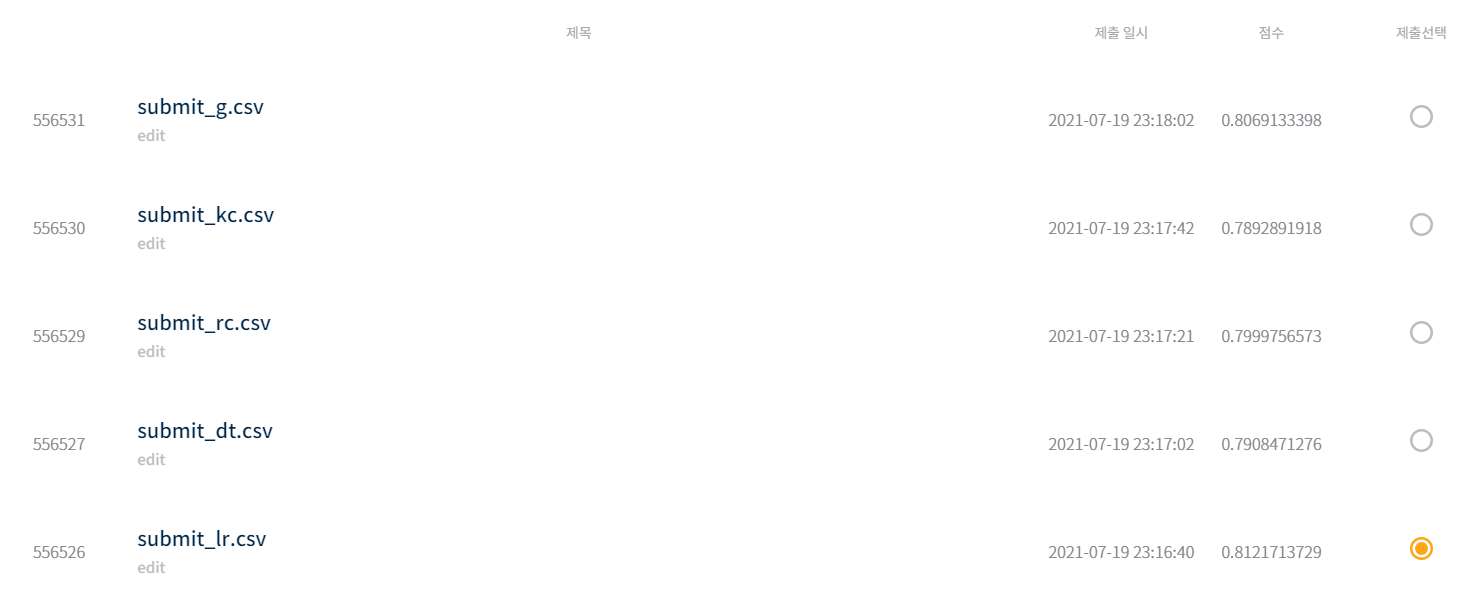

In [140]:
from PIL import Image
score = Image.open("점수.PNG")
display(score)

음.. 캐글에서 모범답을을 확인한후 약간 나의 접근방법으로 바꾸어서 제줄했는데 Linear Regression 모델이 가장 높은 점수가 나왔다

머신러닝 공부 1주차인데 모델들 개념알고 각종 교차검증, 등등 개념은 알겠는데 정확하게 어떻게 사용해야 할지를 잘모르겠다. 정규화를 해주는 과정에서 그냥 mapping 했는데 상관없는지도 모르겟다..ㅠㅠ 

시간이 지나고 공부량이 많아지면 알 수 있길.....